##### Force(1000hz), Acc(6250hz) 조정한 hz는 1초에 10개의 point -> 이후 Force에 맞춰서 downsampling 해서 사용
##### expt_1~12 에서 각각 540개 씩 총 6480 개의 subset 존재(각 subset 마다 0.1초)
##### Acoustic도 마찬가지로 expt_1을 540등분 필요 -> 원본 데이터로 잘라서 검토(안 겹치게 -> point가 너무 작음. window size = 100으로 겹치게 설정, 이후 oversampling(선형 보간))
##### 반면 Acoustic은 hz가 expt별로 일정하지 않음 -> 선형 보간으로 채워서 oversampling 
##### oversampling 이후 Mel spectrogram & SPCC로 변환

# 실제 변환 코드 

In [13]:
import os
import pandas as pd
import numpy as np
import librosa
import librosa.display
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

# 설정
data_dir = "/home/crois-times/timeseries/projects/tool_wear_havard/data/dataverse_files/Dataset/T1/Acoustic_Emission_Data"
output_dir = "/home/crois-times/timeseries/JJ/Multimodal-fusionmodel/Image/T1"
num_splits = 540  # 생성할 Mel Spectrogram 개수
window_size = 1000  # STFT 윈도우 크기
desired_length = 2048  # 보간 후 신호 길이
sr = 1000  # 샘플링 레이트
n_fft = 1000  # FFT 크기
hop_length = 512  # STFT hop 크기
n_mels = 128  # Mel 필터 개수

# 출력 폴더 생성
os.makedirs(output_dir, exist_ok=True)

# Expt_1~Expt_12 반복
image_index = 1  # 전체 이미지 번호
for expt_idx in range(1, 13):  # Expt_1 ~ Expt_12
    file_path = os.path.join(data_dir, f"Expt_{expt_idx}.csv")
    
    # CSV 파일 읽기
    df = pd.read_csv(file_path)
    
    # Stride 계산 (겹치도록 자동 조정)
    stride = (len(df) - window_size) // (num_splits - 1)
    
    # 540개 Mel Spectrogram 생성
    for split_idx in range(num_splits):
        # 슬라이싱
        df_split = df.iloc[split_idx * stride : split_idx * stride + window_size].reset_index(drop=True)
        
        # 신호 데이터 (첫 번째 컬럼 사용)
        signal = df_split.iloc[:, 0].values
        
        # 보간 적용 (길이 맞추기)
        x_original = np.linspace(0, 1, len(signal))
        x_new = np.linspace(0, 1, desired_length)
        interpolator = interp1d(x_original, signal, kind='linear')
        signal_interpolated = interpolator(x_new)
        
        # Mel Spectrogram 변환
        melspec = librosa.feature.melspectrogram(y=signal_interpolated, sr=sr, n_fft=n_fft, hop_length=hop_length, n_mels=n_mels)
        melspec_db = librosa.power_to_db(melspec, ref=np.max)
        
        # 시각화 및 저장
        plt.figure(figsize=(10, 4))
        librosa.display.specshow(melspec_db, sr=sr, hop_length=hop_length, x_axis='time', y_axis='mel')
        plt.colorbar(format='%+2.0f dB')
        plt.title(f"Mel Spectrogram Expt_{expt_idx} - {split_idx+1}")
        plt.xlabel("Time")
        plt.ylabel("Mel Frequency")
        
        # 파일 저장
        file_name = f"{image_index}_Expt_{expt_idx}.png"
        save_path = os.path.join(output_dir, file_name)
        plt.savefig(save_path)
        plt.close()
        
        # 이미지 인덱스 증가
        image_index += 1

print(f"Mel Spectrogram 생성 완료. 총 {image_index-1}개 이미지 저장됨.")


Mel Spectrogram 생성 완료. 총 6480개 이미지 저장됨.


In [2]:
import os
import pandas as pd
import numpy as np
import librosa
import librosa.display
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

# 설정
data_dir = "/home/crois-times/timeseries/projects/tool_wear_havard/data/dataverse_files/Dataset/T8/Acoustic_Emission_Data"
output_dir = "/home/crois-times/timeseries/JJ/Multimodal-fusionmodel/Image/T8"
num_splits = 200  # 생성할 Mel Spectrogram 개수
window_size = 1000  # STFT 윈도우 크기
desired_length = 2048  # 보간 후 신호 길이
sr = 1000  # 샘플링 레이트
n_fft = 1000  # FFT 크기
hop_length = 512  # STFT hop 크기
n_mels = 128  # Mel 필터 개수

# 출력 폴더 생성
os.makedirs(output_dir, exist_ok=True)

# Expt_1~Expt_12 반복
image_index = 1  # 전체 이미지 번호
for expt_idx in range(1, 13):  # Expt_1 ~ Expt_12
    file_path = os.path.join(data_dir, f"Expt_{expt_idx}.csv")
    
    # CSV 파일 읽기
    df = pd.read_csv(file_path)
    
    # Stride 계산 (겹치도록 자동 조정)
    stride = (len(df) - window_size) // (num_splits - 1)
    
    # 540개 Mel Spectrogram 생성
    for split_idx in range(num_splits):
        # 슬라이싱
        df_split = df.iloc[split_idx * stride : split_idx * stride + window_size].reset_index(drop=True)
        
        # 신호 데이터 (첫 번째 컬럼 사용)
        signal = df_split.iloc[:, 0].values
        
        # 보간 적용 (길이 맞추기)
        x_original = np.linspace(0, 1, len(signal))
        x_new = np.linspace(0, 1, desired_length)
        interpolator = interp1d(x_original, signal, kind='linear')
        signal_interpolated = interpolator(x_new)
        
        # Mel Spectrogram 변환
        melspec = librosa.feature.melspectrogram(y=signal_interpolated, sr=sr, n_fft=n_fft, hop_length=hop_length, n_mels=n_mels)
        melspec_db = librosa.power_to_db(melspec, ref=np.max)
        
        # 시각화 및 저장
        plt.figure(figsize=(10, 4))
        librosa.display.specshow(melspec_db, sr=sr, hop_length=hop_length, x_axis='time', y_axis='mel')
        plt.colorbar(format='%+2.0f dB')
        plt.title(f"Mel Spectrogram Expt_{expt_idx} - {split_idx+1}")
        plt.xlabel("Time")
        plt.ylabel("Mel Frequency")
        
        # 파일 저장
        file_name = f"{image_index}_Expt_{expt_idx}.png"
        save_path = os.path.join(output_dir, file_name)
        plt.savefig(save_path)
        plt.close()
        
        # 이미지 인덱스 증가
        image_index += 1

print(f"Mel Spectrogram 생성 완료. 총 {image_index-1}개 이미지 저장됨.")


Mel Spectrogram 생성 완료. 총 2400개 이미지 저장됨.


### Data Load

In [1]:
import pandas as pd

df = pd.read_csv('/home/crois-times/timeseries/projects/tool_wear_havard/data/dataverse_files/Dataset/T5/Acoustic_Emission_Data/Expt_1.csv')


### Data split

In [2]:
import pandas as pd
import numpy as np


# 설정
num_splits = 540  # 원하는 개수
window_size = 1000  # 윈도우 크기

# Stride 계산 (적절한 이동 간격)
stride = (len(df) - window_size) // (num_splits - 1)  # 겹치도록 stride 자동 조정

# 데이터프레임 리스트로 분할
df_splits = [df.iloc[i * stride : i * stride + window_size].reset_index(drop=True) for i in range(num_splits)]

# df_1 ~ df_540 변수 할당
df_dict = {f"df_{i+1}": df_splits[i] for i in range(num_splits)}

# 확인
df_1 = df_dict["df_1"]
df_540 = df_dict["df_540"]

print(f"Stride: {stride}")
print(f"df_1 shape: {df_1.shape}, df_540 shape: {df_540.shape}")


Stride: 5
df_1 shape: (1000, 1), df_540 shape: (1000, 1)


### Mel spectrogram Transformation

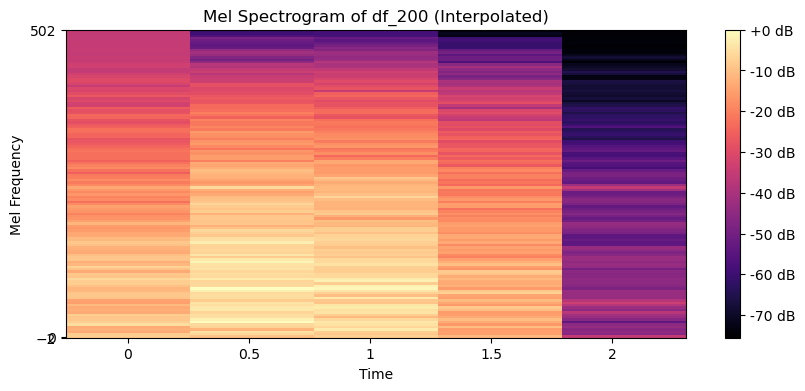

In [11]:
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

# df_200 가져오기
df_200 = df_dict["df_400"]

# 신호 데이터 (첫 번째 컬럼 사용)
signal = df_200.iloc[:, 0].values  
# 길이가 너무 짧다면 보간 적용
desired_length = 2048  # Mel Spectrogram을 만들기 위해 충분한 길이 설정 (원하는 값으로 조절)
x_original = np.linspace(0, 1, len(signal))
x_new = np.linspace(0, 1, desired_length)

# 선형 보간 적용
interpolator = interp1d(x_original, signal, kind='linear')
signal_interpolated = interpolator(x_new)

# 샘플링 레이트 설정 (예제: 100Hz, 실제 데이터에 맞게 수정)
sr = 1000

# Mel Spectrogram 변환
melspec = librosa.feature.melspectrogram(y=signal_interpolated, sr=sr, n_fft=1000, hop_length=512, n_mels=128)

# dB 변환
melspec_db = librosa.power_to_db(melspec, ref=np.max)

# 시각화
plt.figure(figsize=(10, 4))
librosa.display.specshow(melspec_db, sr=sr, hop_length=512, x_axis='time', y_axis='mel')
plt.colorbar(format='%+2.0f dB')
plt.title("Mel Spectrogram of df_200 (Interpolated)")
plt.xlabel("Time")
plt.ylabel("Mel Frequency")
plt.show()


# EDA

In [2]:
import pandas as pd

df = pd.read_csv('/home/crois-times/timeseries/projects/tool_wear_havard/data/dataverse_files/Dataset/T1/Acoustic_Emission_Data/Expt_1.csv')


In [3]:
df

,Acoustic Emission in dB
0,-0.12583
1,-0.16325
2,-0.05100
3,-0.06971
4,-0.03229
...,...
3795,0.04254
3796,0.06125
3797,0.04254
3798,-0.01358


In [21]:
import pandas as pd
import numpy as np
#### 이렇게 하니까.. 너무 point가 적음...
# df를 540개로 등분
num_splits = 540
split_size = len(df) // num_splits  # 각 분할당 row 개수

# 데이터프레임 리스트로 분할
df_splits = [df.iloc[i * split_size: (i + 1) * split_size].reset_index(drop=True) for i in range(num_splits)]

# df_1 ~ df_540 변수 할당
df_dict = {f"df_{i+1}": df_splits[i] for i in range(num_splits)}

# 개별 DataFrame 접근 예시
df_1 = df_dict["df_1"]
df_540 = df_dict["df_540"]

# 첫 번째와 마지막 DataFrame 출력 확인
print(df_1.head(), df_540.head())


   Acoustic Emission in dB
0                -0.127089
1                -0.164879
2                -0.051509
3                -0.070404
4                -0.032614    Acoustic Emission in dB
0                 0.042967
1                -0.013719
2                -0.032614
3                -0.013719
4                 0.042967


In [1]:
import pandas as pd

end = pd.read_csv('/home/crois-times/timeseries/projects/tool_wear_havard/data/dataverse_files/Dataset/T1/Acoustic_Emission_Data/Expt_12.csv')


In [20]:
df

,Acoustic Emission in dB
0,-0.12583
1,-0.16325
2,-0.05100
3,-0.06971
4,-0.03229
...,...
3795,0.04254
3796,0.06125
3797,0.04254
3798,-0.01358


In [4]:
end

,Acoustic Emission in dB
0,-0.032290
1,-0.219370
2,-0.200660
3,-0.163250
4,-0.069710
...,...
6595,-0.088415
6596,-0.032291
6597,-0.107122
6598,-0.050999


In [21]:
import pandas as pd
import numpy as np

# df를 540개로 등분
num_splits = 540
split_size = len(end) // num_splits  # 각 분할당 row 개수

# 데이터프레임 리스트로 분할
end_splits = [end.iloc[i * split_size: (i + 1) * split_size].reset_index(drop=True) for i in range(num_splits)]

# df_1 ~ df_540 변수 할당
end_dict = {f"end_{i+1}": end_splits[i] for i in range(num_splits)}

# 개별 DataFrame 접근 예시
end_1 = end_dict["end_1"]
end_540 = end_dict["end_540"]

# 첫 번째와 마지막 DataFrame 출력 확인
print(end_1.head(), end_540.head())


   Acoustic Emission in dB
0                 -0.03229
1                 -0.21937
2                 -0.20066
3                 -0.16325
4                 -0.06971    Acoustic Emission in dB
0                -0.032291
1                 0.023833
2                -0.032291
3                 0.005125
4                 0.005125


[-0.18195 -0.10712 -0.08841 -0.12583 -0.14454 -0.06971 -0.18195 -0.051
 -0.14454 -0.051    0.06125  0.04254]


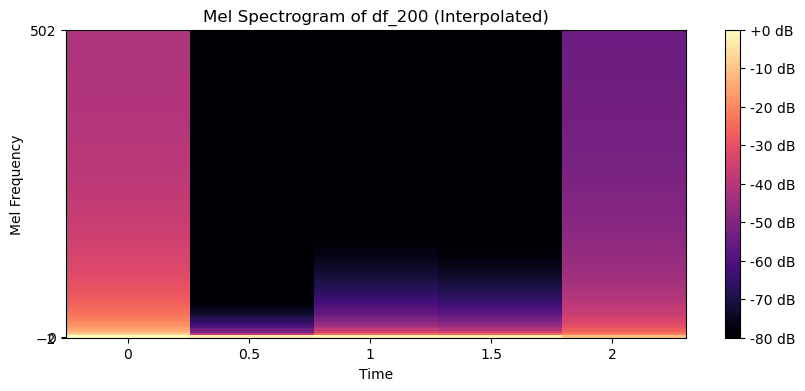

In [41]:
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

# df_200 가져오기
end_200 = end_dict["end_10"]

# 신호 데이터 (첫 번째 컬럼 사용)
signal = end_200.iloc[:, 0].values  
print(signal)
# 길이가 너무 짧다면 보간 적용
desired_length = 2048  # Mel Spectrogram을 만들기 위해 충분한 길이 설정 (원하는 값으로 조절)
x_original = np.linspace(0, 1, len(signal))
x_new = np.linspace(0, 1, desired_length)

# 선형 보간 적용
interpolator = interp1d(x_original, signal, kind='linear')
signal_interpolated = interpolator(x_new)

# 샘플링 레이트 설정 (예제: 100Hz, 실제 데이터에 맞게 수정)
sr = 1000  

# Mel Spectrogram 변환
melspec = librosa.feature.melspectrogram(y=signal_interpolated, sr=sr, n_fft=512, hop_length=512, n_mels=128)

# dB 변환
melspec_db = librosa.power_to_db(melspec, ref=np.max)

# 시각화
plt.figure(figsize=(10, 4))
librosa.display.specshow(melspec_db, sr=sr, hop_length=512, x_axis='time', y_axis='mel')
plt.colorbar(format='%+2.0f dB')
plt.title("Mel Spectrogram of df_200 (Interpolated)")
plt.xlabel("Time")
plt.ylabel("Mel Frequency")
plt.show()


[-0.31291 -0.03229 -0.08841 -0.20066 -0.12583  0.00513 -0.18195]


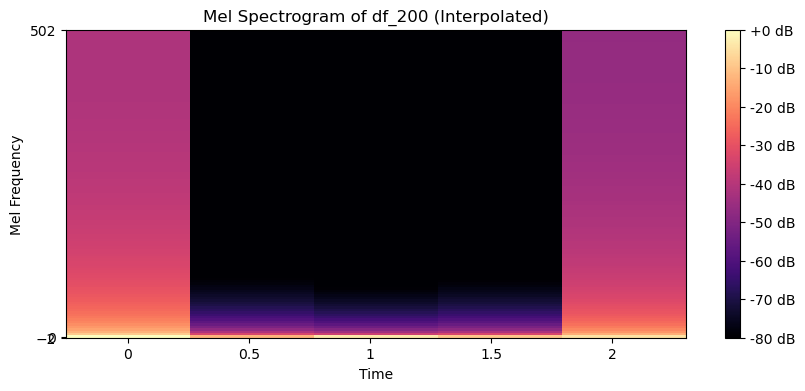

In [45]:
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

# df_200 가져오기
df_200 = df_dict["df_50"]

# 신호 데이터 (첫 번째 컬럼 사용)
signal = df_200.iloc[:, 0].values  
print(signal)
# 길이가 너무 짧다면 보간 적용
desired_length = 2048  # Mel Spectrogram을 만들기 위해 충분한 길이 설정 (원하는 값으로 조절)
x_original = np.linspace(0, 1, len(signal))
x_new = np.linspace(0, 1, desired_length)

# 선형 보간 적용
interpolator = interp1d(x_original, signal, kind='linear')
signal_interpolated = interpolator(x_new)

# 샘플링 레이트 설정 (예제: 100Hz, 실제 데이터에 맞게 수정)
sr = 1000  

# Mel Spectrogram 변환
melspec = librosa.feature.melspectrogram(y=signal_interpolated, sr=sr, n_fft=1000, hop_length=512, n_mels=128)

# dB 변환
melspec_db = librosa.power_to_db(melspec, ref=np.max)

# 시각화
plt.figure(figsize=(10, 4))
librosa.display.specshow(melspec_db, sr=sr, hop_length=512, x_axis='time', y_axis='mel')
plt.colorbar(format='%+2.0f dB')
plt.title("Mel Spectrogram of df_200 (Interpolated)")
plt.xlabel("Time")
plt.ylabel("Mel Frequency")
plt.show()


### 겹치더라도 충분한 window size 설정 (w = 1000)

In [23]:
import pandas as pd
import numpy as np


# 설정
num_splits = 540  # 원하는 개수
window_size = 1000  # 윈도우 크기

# Stride 계산 (적절한 이동 간격)
stride = (len(df) - window_size) // (num_splits - 1)  # 겹치도록 stride 자동 조정

# 데이터프레임 리스트로 분할
df_splits = [df.iloc[i * stride : i * stride + window_size].reset_index(drop=True) for i in range(num_splits)]

# df_1 ~ df_540 변수 할당
df_dict = {f"df_{i+1}": df_splits[i] for i in range(num_splits)}

# 확인
df_1 = df_dict["df_1"]
df_540 = df_dict["df_540"]

print(f"Stride: {stride}")
print(f"df_1 shape: {df_1.shape}, df_540 shape: {df_540.shape}")


Stride: 5
df_1 shape: (1000, 1), df_540 shape: (1000, 1)


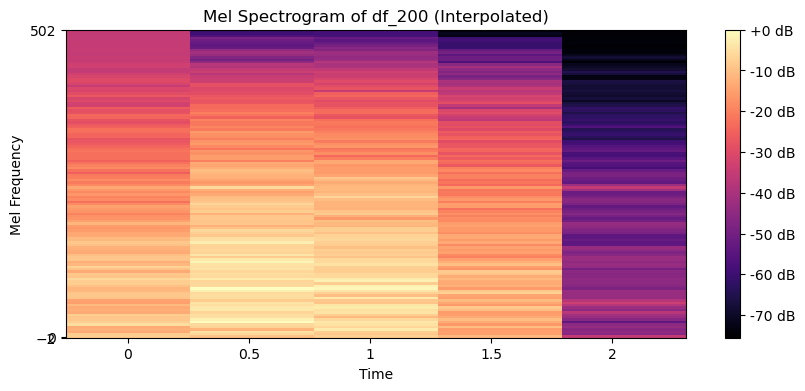

In [10]:
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

# df_200 가져오기
df_200 = df_dict["df_400"]

# 신호 데이터 (첫 번째 컬럼 사용)
signal = df_200.iloc[:, 0].values  
# 길이가 너무 짧다면 보간 적용
desired_length = 2048  # Mel Spectrogram을 만들기 위해 충분한 길이 설정 (원하는 값으로 조절)
x_original = np.linspace(0, 1, len(signal))
x_new = np.linspace(0, 1, desired_length)

# 선형 보간 적용
interpolator = interp1d(x_original, signal, kind='linear')
signal_interpolated = interpolator(x_new)

# 샘플링 레이트 설정 (예제: 100Hz, 실제 데이터에 맞게 수정)
sr = 1000  

# Mel Spectrogram 변환
melspec = librosa.feature.melspectrogram(y=signal_interpolated, sr=sr, n_fft=1000, hop_length=512, n_mels=128)

# dB 변환
melspec_db = librosa.power_to_db(melspec, ref=np.max)

# 시각화
plt.figure(figsize=(10, 4))
librosa.display.specshow(melspec_db, sr=sr, hop_length=512, x_axis='time', y_axis='mel')
plt.colorbar(format='%+2.0f dB')
plt.title("Mel Spectrogram of df_200 (Interpolated)")
plt.xlabel("Time")
plt.ylabel("Mel Frequency")
plt.show()


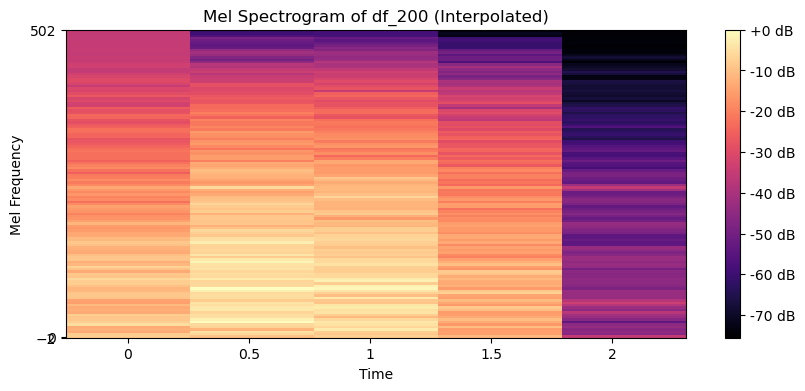

In [24]:
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

# df_200 가져오기
df_200 = df_dict["df_400"]

# 신호 데이터 (첫 번째 컬럼 사용)
signal = df_200.iloc[:, 0].values  
# 길이가 너무 짧다면 보간 적용
desired_length = 2048  # Mel Spectrogram을 만들기 위해 충분한 길이 설정 (원하는 값으로 조절)
x_original = np.linspace(0, 1, len(signal))
x_new = np.linspace(0, 1, desired_length)

# 선형 보간 적용
interpolator = interp1d(x_original, signal, kind='linear')
signal_interpolated = interpolator(x_new)

# 샘플링 레이트 설정 (예제: 100Hz, 실제 데이터에 맞게 수정)
sr = 1000  

# Mel Spectrogram 변환
melspec = librosa.feature.melspectrogram(y=signal_interpolated, sr=sr, n_fft=1000, hop_length=512, n_mels=128)

# dB 변환
melspec_db = librosa.power_to_db(melspec, ref=np.max)

# 시각화
plt.figure(figsize=(10, 4))
librosa.display.specshow(melspec_db, sr=sr, hop_length=512, x_axis='time', y_axis='mel')
plt.colorbar(format='%+2.0f dB')
plt.title("Mel Spectrogram of df_200 (Interpolated)")
plt.xlabel("Time")
plt.ylabel("Mel Frequency")
plt.show()


In [7]:
import pandas as pd
import numpy as np

###### 얘를 살려야 함 !
# 설정
num_splits = 540  # 원하는 개수
window_size = 1000  # 윈도우 크기

# Stride 계산 (적절한 이동 간격)
stride = (len(end) - window_size) // (num_splits - 1)  # 겹치도록 stride 자동 조정

# 데이터프레임 리스트로 분할
end_splits = [end.iloc[i * stride : i * stride + window_size].reset_index(drop=True) for i in range(num_splits)]

# df_1 ~ df_540 변수 할당
end_dict = {f"end_{i+1}": end_splits[i] for i in range(num_splits)}

# 확인
end_1 = end_dict["end_1"]
end_540 = end_dict["end_540"]

print(f"Stride: {stride}")
print(f"end_1 shape: {end_1.shape}, end_540 shape: {end_540.shape}")


Stride: 10
end_1 shape: (1000, 1), end_540 shape: (1000, 1)


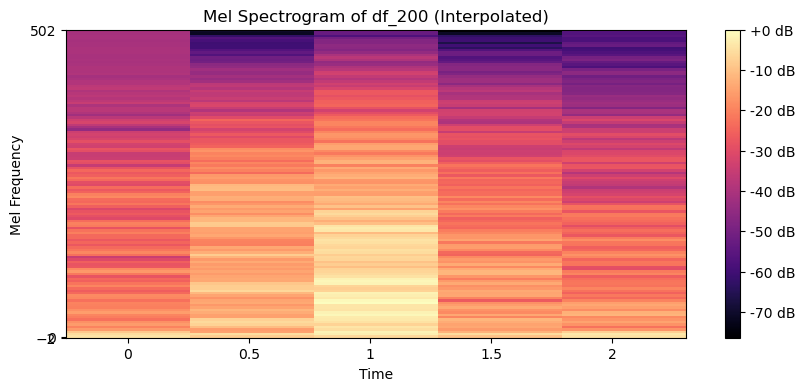

In [11]:
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

# df_200 가져오기
end_200 = end_dict["end_400"]

# 신호 데이터 (첫 번째 컬럼 사용)
signal = end_200.iloc[:, 0].values  
# 길이가 너무 짧다면 보간 적용
desired_length = 2048  # Mel Spectrogram을 만들기 위해 충분한 길이 설정 (원하는 값으로 조절)
x_original = np.linspace(0, 1, len(signal))
x_new = np.linspace(0, 1, desired_length)

# 선형 보간 적용
interpolator = interp1d(x_original, signal, kind='linear')
signal_interpolated = interpolator(x_new)

# 샘플링 레이트 설정 (예제: 100Hz, 실제 데이터에 맞게 수정)
sr = 1000  

# Mel Spectrogram 변환
melspec = librosa.feature.melspectrogram(y=signal_interpolated, sr=sr, n_fft=512, hop_length=512, n_mels=128)

# dB 변환
melspec_db = librosa.power_to_db(melspec, ref=np.max)

# 시각화
plt.figure(figsize=(10, 4))
librosa.display.specshow(melspec_db, sr=sr, hop_length=512, x_axis='time', y_axis='mel')
plt.colorbar(format='%+2.0f dB')
plt.title("Mel Spectrogram of df_200 (Interpolated)")
plt.xlabel("Time")
plt.ylabel("Mel Frequency")
plt.show()


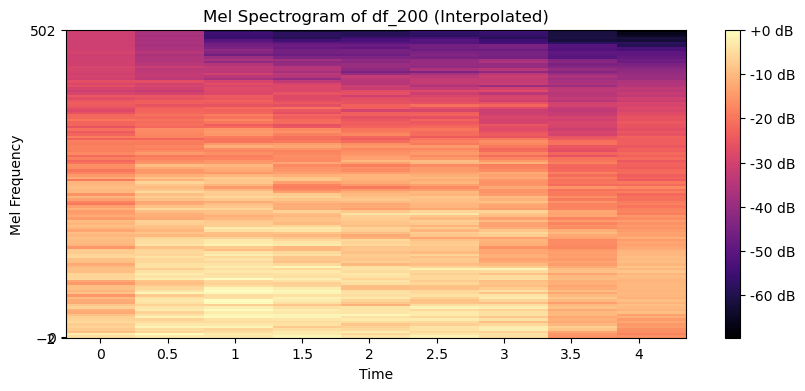

In [62]:
import numpy as np
import librosa
import librosa.display
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

# df_200 가져오기
end_200 = end_dict["end_200"]

# 신호 데이터 (첫 번째 컬럼 사용)
signal = end_200.iloc[:, 0].values  

# 기존 인덱스 유지 (0, 1, 2, ..., len(signal)-1)
x_original = np.arange(len(signal))

# 보간할 새로운 인덱스 (2048 크기로 확장)
x_new = np.linspace(0, len(signal) - 1, 2048)

# 선형 보간 수행 (데이터 범위를 유지하면서 길이를 늘림)
interpolator = interp1d(x_original, signal, kind='linear', fill_value="extrapolate")
signal_interpolated = interpolator(x_new)

# 샘플링 레이트 설정 (예제: 1000Hz, 실제 데이터에 맞게 수정)
sr = 1000  

# Mel Spectrogram 변환
melspec = librosa.feature.melspectrogram(y=signal_interpolated, sr=sr, n_fft=1024, hop_length=256, n_mels=128)

# dB 변환
melspec_db = librosa.power_to_db(melspec, ref=np.max)

# 시각화
plt.figure(figsize=(10, 4))
librosa.display.specshow(melspec_db, sr=sr, hop_length=512, x_axis='time', y_axis='mel')
plt.colorbar(format='%+2.0f dB')
plt.title("Mel Spectrogram of df_200 (Interpolated)")
plt.xlabel("Time")
plt.ylabel("Mel Frequency")
plt.show()


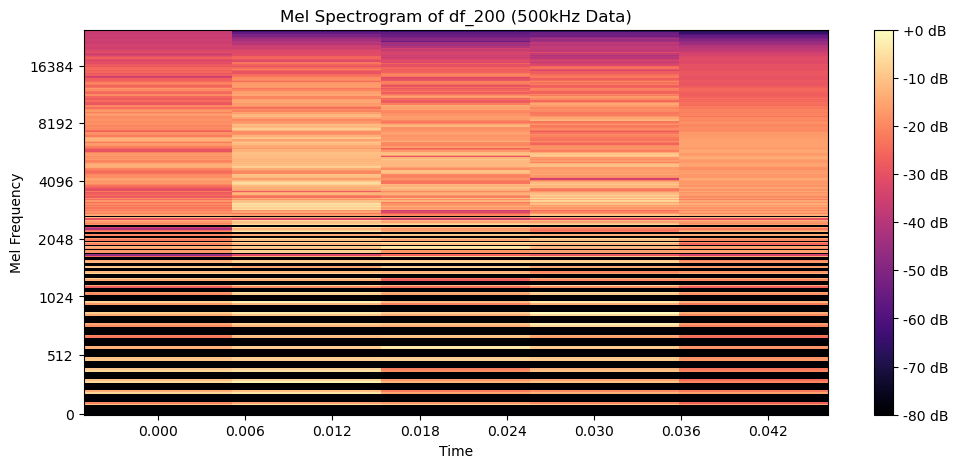

In [83]:
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

# df_200 가져오기
end_200 = end_dict["end_200"]

# 신호 데이터 (첫 번째 컬럼 사용)
signal = end_200.iloc[:, 0].values  

# 기존 인덱스 유지
x_original = np.arange(len(signal))

# 보간할 새로운 인덱스 (2048 크기로 확장)
x_new = np.linspace(0, len(signal) - 1, 2048)

# 선형 보간 수행 (데이터 범위를 유지하면서 길이를 늘림)
interpolator = interp1d(x_original, signal, kind='linear', fill_value="extrapolate")
signal_interpolated = interpolator(x_new)

# 샘플링 레이트 설정 (500kHz)
sr = 50000  

# Mel Spectrogram 변환 (고해상도 설정)
melspec = librosa.feature.melspectrogram(y=signal_interpolated, sr=sr, n_fft=512, hop_length=512, n_mels=256)

# dB 변환
melspec_db = librosa.power_to_db(melspec, ref=np.max)

# 시각화
plt.figure(figsize=(12, 5))
librosa.display.specshow(melspec_db, sr=sr, hop_length=512, x_axis='time', y_axis='mel')
plt.colorbar(format='%+2.0f dB')
plt.title("Mel Spectrogram of df_200 (500kHz Data)")
plt.xlabel("Time")
plt.ylabel("Mel Frequency")
plt.show()


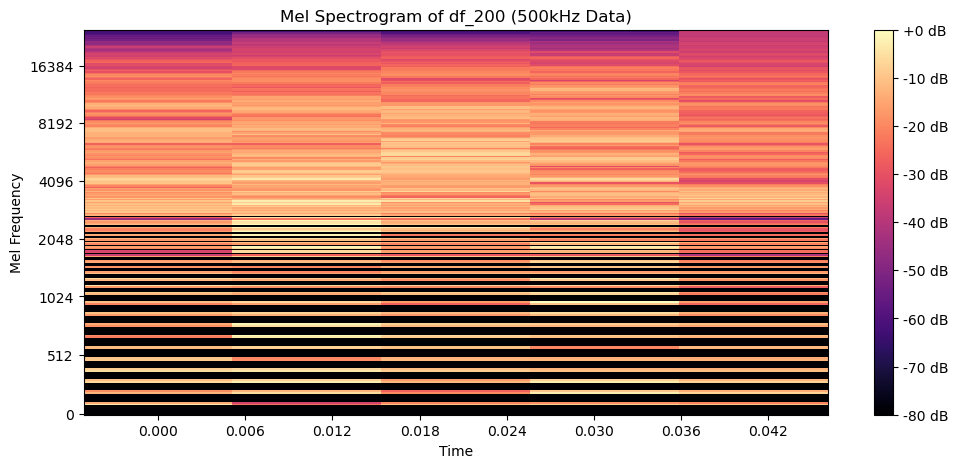

In [82]:
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

# df_200 가져오기
end_200 = df_dict["df_200"]

# 신호 데이터 (첫 번째 컬럼 사용)
signal = end_200.iloc[:, 0].values  

# 기존 인덱스 유지
x_original = np.arange(len(signal))

# 보간할 새로운 인덱스 (2048 크기로 확장)
x_new = np.linspace(0, len(signal) - 1, 2048)

# 선형 보간 수행 (데이터 범위를 유지하면서 길이를 늘림)
interpolator = interp1d(x_original, signal, kind='linear', fill_value="extrapolate")
signal_interpolated = interpolator(x_new)

# 샘플링 레이트 설정 (500kHz)
sr = 50000  

# Mel Spectrogram 변환 (고해상도 설정)
melspec = librosa.feature.melspectrogram(y=signal_interpolated, sr=sr, n_fft=512, hop_length=512, n_mels=256)

# dB 변환
melspec_db = librosa.power_to_db(melspec, ref=np.max)

# 시각화
plt.figure(figsize=(12, 5))
librosa.display.specshow(melspec_db, sr=sr, hop_length=512, x_axis='time', y_axis='mel')
plt.colorbar(format='%+2.0f dB')
plt.title("Mel Spectrogram of df_200 (500kHz Data)")
plt.xlabel("Time")
plt.ylabel("Mel Frequency")
plt.show()


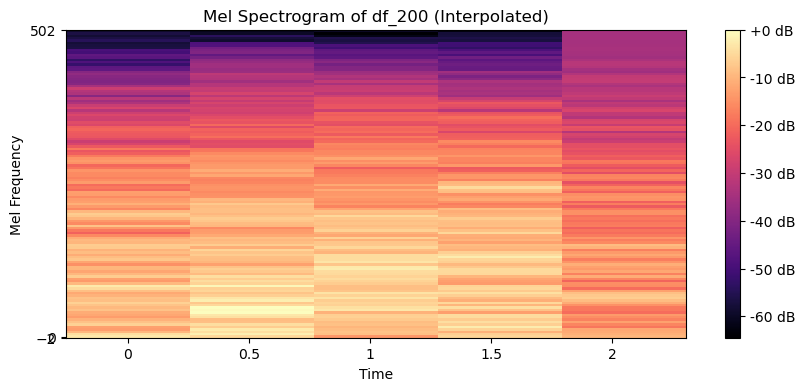

In [60]:
import numpy as np
import librosa
import librosa.display
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

# df_200 가져오기
end_200 = df_dict["df_200"]

# 신호 데이터 (첫 번째 컬럼 사용)
signal = end_200.iloc[:, 0].values  

# 기존 인덱스 유지 (0, 1, 2, ..., len(signal)-1)
x_original = np.arange(len(signal))

# 보간할 새로운 인덱스 (2048 크기로 확장)
x_new = np.linspace(0, len(signal) - 1, 2048)

# 선형 보간 수행 (데이터 범위를 유지하면서 길이를 늘림)
interpolator = interp1d(x_original, signal, kind='linear', fill_value="extrapolate")
signal_interpolated = interpolator(x_new)

# 샘플링 레이트 설정 (예제: 1000Hz, 실제 데이터에 맞게 수정)
sr = 1000  

# Mel Spectrogram 변환
melspec = librosa.feature.melspectrogram(y=signal_interpolated, sr=sr, n_fft=1024, hop_length=512, n_mels=128)

# dB 변환
melspec_db = librosa.power_to_db(melspec, ref=np.max)

# 시각화
plt.figure(figsize=(10, 4))
librosa.display.specshow(melspec_db, sr=sr, hop_length=512, x_axis='time', y_axis='mel')
plt.colorbar(format='%+2.0f dB')
plt.title("Mel Spectrogram of df_200 (Interpolated)")
plt.xlabel("Time")
plt.ylabel("Mel Frequency")
plt.show()


In [ ]:
me

In [5]:
d = pd.read_csv('/home/crois-times/timeseries/projects/tool_wear_havard/data/splitted_100ms/T1/Accelerometer/T1_001_Expt_1_1.csv')

In [6]:
d

,Vibration in X (g),Vibration in Y (g),Vibration in Z (g)
0,-0.001308,0.000654,-0.003052
1,-0.003706,0.000000,-0.002834
2,-0.003706,0.000000,-0.002616
3,-0.001526,0.000000,-0.002180
4,0.000872,-0.000654,-0.002180
...,...,...,...
620,-0.001308,0.002398,-0.003706
621,-0.002180,0.001744,-0.002616
622,-0.002834,0.000436,-0.002180
623,-0.002616,-0.000218,-0.002398


In [7]:
d = pd.read_csv('/home/crois-times/timeseries/projects/tool_wear_havard/data/splitted_100ms/T1/Force/T1_001_Expt_1_1.csv')

In [8]:
d

,Force in X axis (N),Force in Y axis (N),Force in Z axis (N)
0,15.5640,11.2915,30.5176
1,16.1743,12.8174,34.1797
2,16.1743,11.9019,30.5176
3,14.9536,11.9019,31.7383
4,15.5640,11.9019,32.9590
...,...,...,...
95,16.7847,10.9863,30.5176
96,14.6484,13.1226,31.7383
97,15.2588,12.8174,29.2969
98,17.0898,13.4277,34.1797


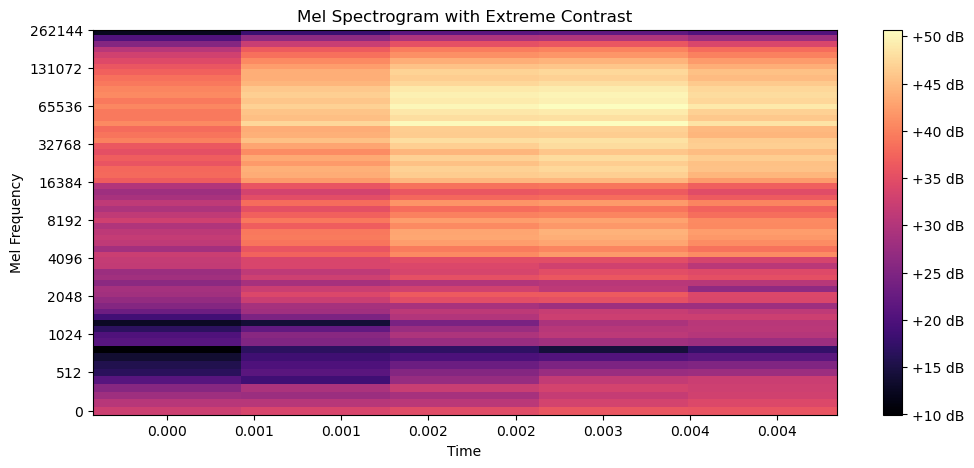

In [17]:
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

# df_200 가져오기
end_200 = end_dict["end_480"]

# 신호 데이터 (첫 번째 컬럼 사용)
signal = end_200.iloc[:, 0].values  

# 기존 인덱스 유지
x_original = np.arange(len(signal))

# 보간할 새로운 인덱스 (길이가 부족할 경우 2048 크기로 확장)
desired_length = 2048
if len(signal) < desired_length:
    x_new = np.linspace(0, len(signal) - 1, desired_length)
    interpolator = interp1d(x_original, signal, kind='linear', fill_value="extrapolate")
    signal_interpolated = interpolator(x_new)
else:
    signal_interpolated = signal

# 샘플링 레이트 설정 (500kHz)
sr = 500000  

# Zero-Padding 적용 (짧은 경우만)
if len(signal_interpolated) < desired_length:
    pad_width = desired_length - len(signal_interpolated)
    signal_interpolated = np.pad(signal_interpolated, (0, pad_width), mode='constant')

# Mel Spectrogram 변환 (극적인 차이를 위한 설정)
melspec = librosa.feature.melspectrogram(
    y=signal_interpolated, 
    sr=sr, 
    n_fft=4096,         # 높은 주파수 해상도
    hop_length=512,     # 시간 해상도 증가
    n_mels=64,          # 주파수 해상도 대비 증가
    norm=None           # 정규화 비활성화 (더 극적인 차이)
)

# dB 변환 (강한 대비)
melspec_db = librosa.power_to_db(melspec, ref=1.0)

# 시각화
plt.figure(figsize=(12, 5))
librosa.display.specshow(melspec_db, sr=sr, hop_length=512, x_axis='time', y_axis='mel')
plt.colorbar(format='%+2.0f dB')
plt.title("Mel Spectrogram with Extreme Contrast")
plt.xlabel("Time")
plt.ylabel("Mel Frequency")
plt.show()


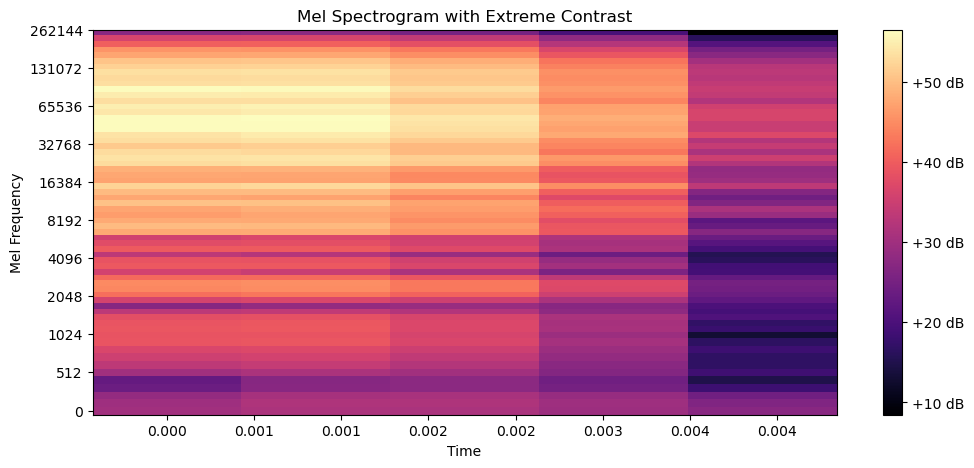

In [16]:
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

# df_200 가져오기
end_200 = df_dict["df_480"]

# 신호 데이터 (첫 번째 컬럼 사용)
signal = end_200.iloc[:, 0].values  

# 기존 인덱스 유지
x_original = np.arange(len(signal))

# 보간할 새로운 인덱스 (길이가 부족할 경우 2048 크기로 확장)
desired_length = 2048
if len(signal) < desired_length:
    x_new = np.linspace(0, len(signal) - 1, desired_length)
    interpolator = interp1d(x_original, signal, kind='linear', fill_value="extrapolate")
    signal_interpolated = interpolator(x_new)
else:
    signal_interpolated = signal

# 샘플링 레이트 설정 (500kHz)
sr = 500000  

# Zero-Padding 적용 (짧은 경우만)
if len(signal_interpolated) < desired_length:
    pad_width = desired_length - len(signal_interpolated)
    signal_interpolated = np.pad(signal_interpolated, (0, pad_width), mode='constant')

# Mel Spectrogram 변환 (극적인 차이를 위한 설정)
melspec = librosa.feature.melspectrogram(
    y=signal_interpolated, 
    sr=sr, 
    n_fft=4096,         # 높은 주파수 해상도
    hop_length=512,     # 시간 해상도 증가
    n_mels=64,          # 주파수 해상도 대비 증가
    norm=None           # 정규화 비활성화 (더 극적인 차이)
)

# dB 변환 (강한 대비)
melspec_db = librosa.power_to_db(melspec, ref=1.0)

# 시각화
plt.figure(figsize=(12, 5))
librosa.display.specshow(melspec_db, sr=sr, hop_length=512, x_axis='time', y_axis='mel')
plt.colorbar(format='%+2.0f dB')
plt.title("Mel Spectrogram with Extreme Contrast")
plt.xlabel("Time")
plt.ylabel("Mel Frequency")
plt.show()


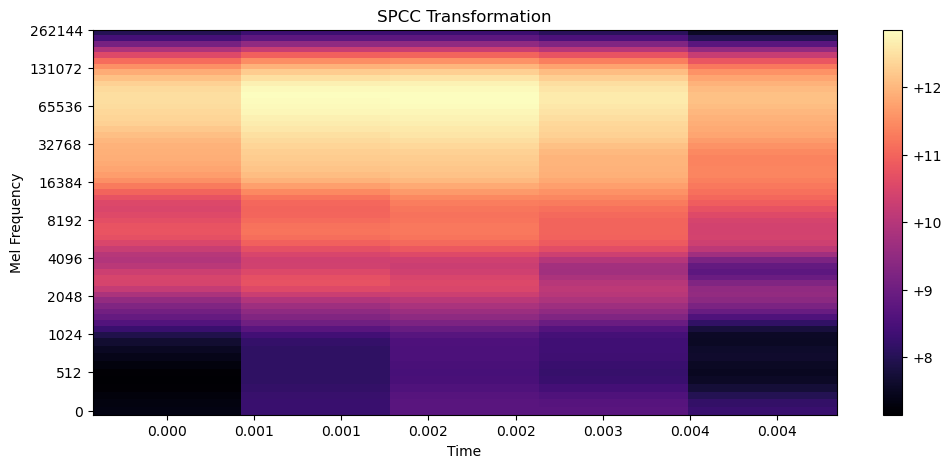

In [99]:
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
from scipy.ndimage import gaussian_filter1d  # SPCC 스무딩 적용

# df_200 가져오기
end_200 = end_dict["end_100"]

# 신호 데이터 (첫 번째 컬럼 사용)
signal = end_200.iloc[:, 0].values  

# 기존 인덱스 유지
x_original = np.arange(len(signal))

# 보간할 새로운 인덱스 (길이가 부족할 경우 2048 크기로 확장)
desired_length = 2048
if len(signal) < desired_length:
    x_new = np.linspace(0, len(signal) - 1, desired_length)
    interpolator = interp1d(x_original, signal, kind="linear", fill_value="extrapolate")
    signal_interpolated = interpolator(x_new)
else:
    signal_interpolated = signal

# 샘플링 레이트 설정 (500kHz)
sr = 500000  

# Zero-Padding 적용 (짧은 경우만)
if len(signal_interpolated) < desired_length:
    pad_width = desired_length - len(signal_interpolated)
    signal_interpolated = np.pad(signal_interpolated, (0, pad_width), mode='constant')

# Mel Spectrogram 변환 (극적인 차이를 위한 설정)
melspec = librosa.feature.melspectrogram(
    y=signal_interpolated, 
    sr=sr, 
    n_fft=4096,         # 높은 주파수 해상도
    hop_length=512,     # 시간 해상도 증가
    n_mels=64,          # 주파수 해상도 대비 증가
    norm=None           # 정규화 비활성화 (더 극적인 차이)
)

# **SPCC 변환**
# 1. Log 변환 적용
spcc_features = np.log1p(melspec)  # log(1 + x) 변환 적용

# 2. 주파수 대역에서 Gaussian 스무딩 적용
spcc_features = gaussian_filter1d(spcc_features, sigma=2, axis=0)

# SPCC 시각화
plt.figure(figsize=(12, 5))
librosa.display.specshow(spcc_features, sr=sr, hop_length=512, x_axis='time', y_axis='mel')
plt.colorbar(format='%+2.0f')
plt.title("SPCC Transformation")
plt.xlabel("Time")
plt.ylabel("Mel Frequency")
plt.show()


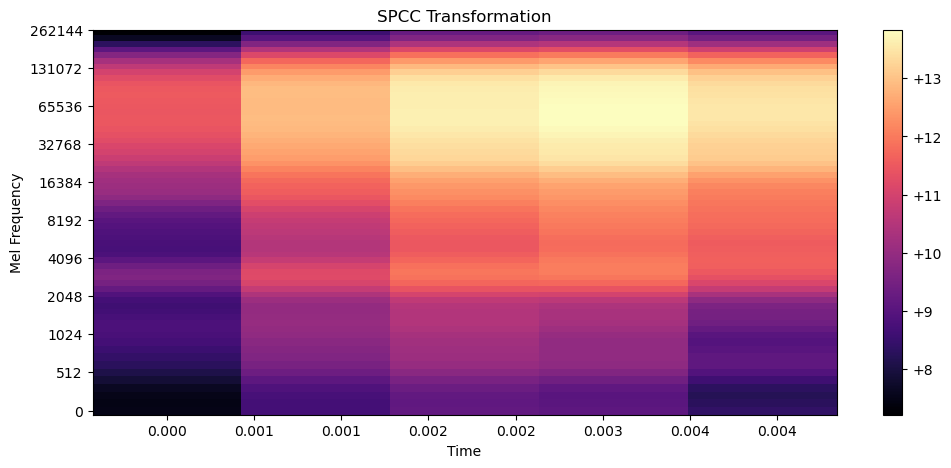

In [100]:
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
from scipy.ndimage import gaussian_filter1d  # SPCC 스무딩 적용

# df_200 가져오기
end_200 = df_dict["df_100"]

# 신호 데이터 (첫 번째 컬럼 사용)
signal = end_200.iloc[:, 0].values  

# 기존 인덱스 유지
x_original = np.arange(len(signal))

# 보간할 새로운 인덱스 (길이가 부족할 경우 2048 크기로 확장)
desired_length = 2048
if len(signal) < desired_length:
    x_new = np.linspace(0, len(signal) - 1, desired_length)
    interpolator = interp1d(x_original, signal, kind="linear", fill_value="extrapolate")
    signal_interpolated = interpolator(x_new)
else:
    signal_interpolated = signal

# 샘플링 레이트 설정 (500kHz)
sr = 500000  

# Zero-Padding 적용 (짧은 경우만)
if len(signal_interpolated) < desired_length:
    pad_width = desired_length - len(signal_interpolated)
    signal_interpolated = np.pad(signal_interpolated, (0, pad_width), mode='constant')

# Mel Spectrogram 변환 (극적인 차이를 위한 설정)
melspec = librosa.feature.melspectrogram(
    y=signal_interpolated, 
    sr=sr, 
    n_fft=4096,         # 높은 주파수 해상도
    hop_length=512,     # 시간 해상도 증가
    n_mels=64,          # 주파수 해상도 대비 증가
    norm=None           # 정규화 비활성화 (더 극적인 차이)
)

# **SPCC 변환**
# 1. Log 변환 적용
spcc_features = np.log1p(melspec)  # log(1 + x) 변환 적용

# 2. 주파수 대역에서 Gaussian 스무딩 적용
spcc_features = gaussian_filter1d(spcc_features, sigma=2, axis=0)

# SPCC 시각화
plt.figure(figsize=(12, 5))
librosa.display.specshow(spcc_features, sr=sr, hop_length=512, x_axis='time', y_axis='mel')
plt.colorbar(format='%+2.0f')
plt.title("SPCC Transformation")
plt.xlabel("Time")
plt.ylabel("Mel Frequency")
plt.show()


/tmp/ipykernel_608050/3041068650.py:76: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


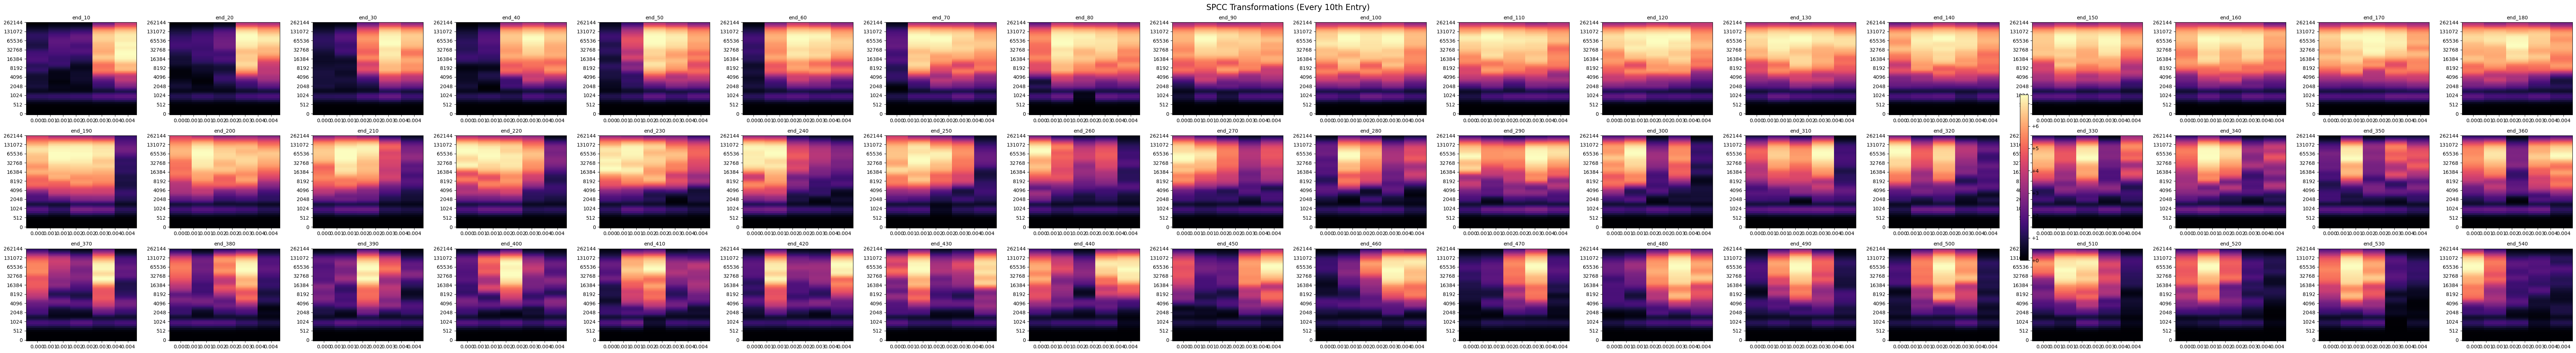

In [107]:
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
from scipy.ndimage import gaussian_filter1d  # SPCC 스무딩 적용

# 샘플링 레이트 설정 (500kHz)
sr = 500000  
desired_length = 2048  # 보간할 데이터 길이
n_mels = 64  # 주파수 해상도 대비 증가
hop_length = 512  # 시간 해상도 증가

# 10의 배수인 key만 필터링
filtered_keys = [key for key in end_dict.keys() if int(key.split('_')[-1]) % 10 == 0]
num_entries = len(filtered_keys)

# **세로 3개씩 배치 (가로 개수 자동 조정)**
num_rows = 3  # 세로는 항상 3개
num_cols = int(np.ceil(num_entries / num_rows))  # 가로 개수 자동 조정

# 전체 figure 생성
fig, axes = plt.subplots(num_rows, num_cols, figsize=(4 * num_cols, 10))  # 가로, 세로 크기 자동 조정
axes = axes.flatten()  # 2D 배열을 1D 리스트로 변환

# 각 선택된 end_dict 요소별 SPCC 변환 수행
for idx, key in enumerate(filtered_keys):
    end_data = end_dict[key]

    # 신호 데이터 (첫 번째 컬럼 사용)
    signal = end_data.iloc[:, 0].values  
    signal_length = len(signal)

    # 적절한 n_fft 값 설정 (입력 신호보다 크지 않도록)
    n_fft = min(2048, signal_length // 2)  # 신호의 절반 이하로 제한

    # 기존 인덱스 유지
    x_original = np.arange(len(signal))

    # 보간할 새로운 인덱스 (길이가 부족할 경우 2048 크기로 확장)
    if len(signal) < desired_length:
        x_new = np.linspace(0, len(signal) - 1, desired_length)
        interpolator = interp1d(x_original, signal, kind="linear", fill_value="extrapolate")
        signal_interpolated = interpolator(x_new)
    else:
        signal_interpolated = signal

    # Zero-Padding 적용 (짧은 경우만)
    if len(signal_interpolated) < desired_length:
        pad_width = desired_length - len(signal_interpolated)
        signal_interpolated = np.pad(signal_interpolated, (0, pad_width), mode='constant')

    # Mel Spectrogram 변환
    melspec = librosa.feature.melspectrogram(
        y=signal_interpolated, sr=sr, n_fft=n_fft, hop_length=hop_length, n_mels=n_mels, norm=None
    )

    # SPCC 변환 (log 변환 + Gaussian 스무딩)
    spcc_features = np.log1p(melspec)  # log(1 + x) 변환
    spcc_features = gaussian_filter1d(spcc_features, sigma=2, axis=0)  # 주파수 대역에서 Gaussian 스무딩 적용

    # 현재 subplot 선택
    ax = axes[idx]
    img = librosa.display.specshow(spcc_features, sr=sr, hop_length=hop_length, x_axis='time', y_axis='mel', ax=ax)
    ax.set_title(f"{key}", fontsize=10)  # key 이름을 제목으로 설정
    ax.set_xlabel("")
    ax.set_ylabel("")

# 남은 빈 subplot 숨기기 (데이터 개수가 subplot 개수보다 작을 경우)
for i in range(idx + 1, len(axes)):
    fig.delaxes(axes[i])

# 전체 colorbar 추가
fig.colorbar(img, ax=axes, format='%+2.0f', shrink=0.6)
plt.suptitle("SPCC Transformations (Every 10th Entry)", fontsize=16)
plt.tight_layout()
plt.show()


/tmp/ipykernel_608050/2761021771.py:76: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


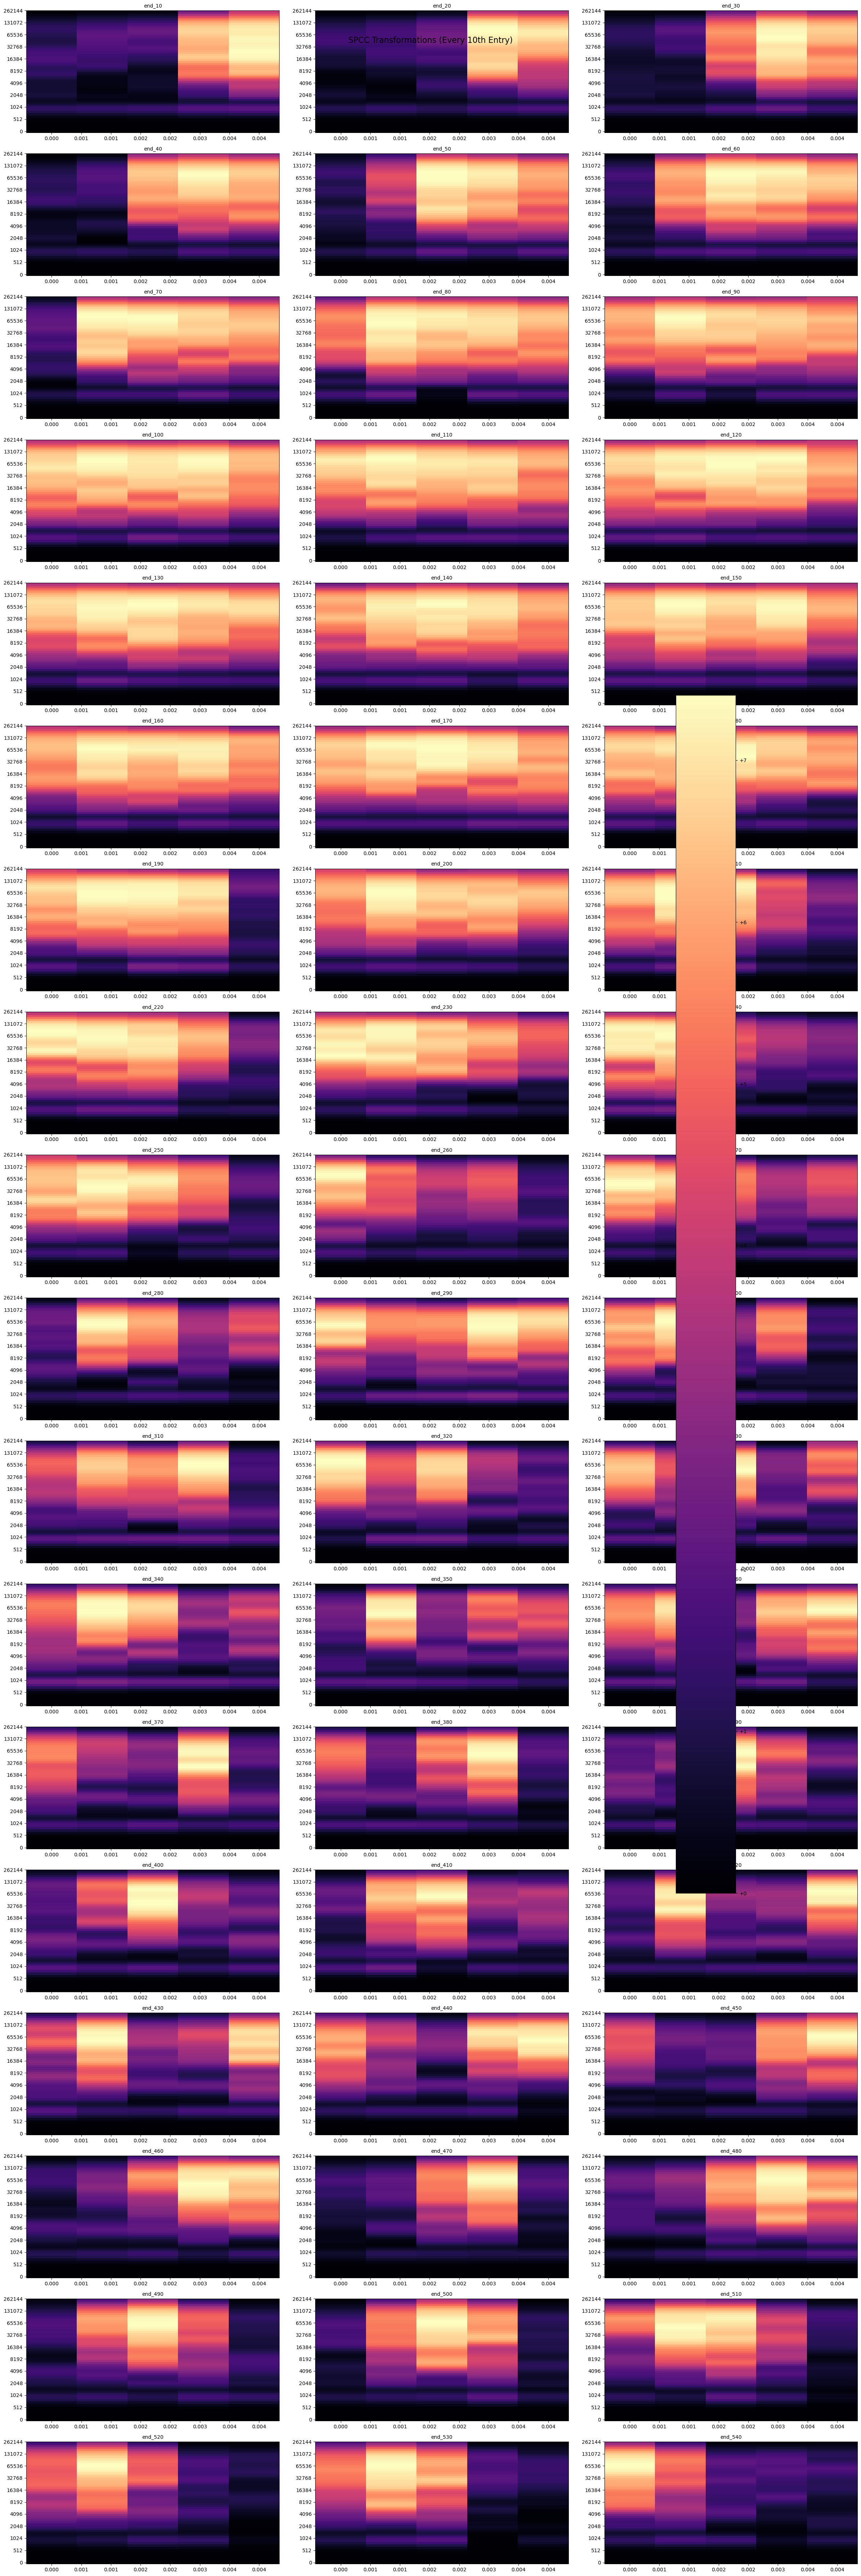

In [109]:
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
from scipy.ndimage import gaussian_filter1d  # SPCC 스무딩 적용

# 샘플링 레이트 설정 (500kHz)
sr = 500000  
desired_length = 2048  # 보간할 데이터 길이
n_mels = 64  # 주파수 해상도 대비 증가
hop_length = 512  # 시간 해상도 증가

# **10의 배수인 key만 필터링**
filtered_keys = [key for key in end_dict.keys() if int(key.split('_')[-1]) % 10 == 0]
num_entries = len(filtered_keys)

# **가로 3개씩 배치 (세로 개수 자동 조정)**
num_cols = 3  # 항상 가로로 3개
num_rows = int(np.ceil(num_entries / num_cols))  # 세로 개수 자동 조정

# 전체 figure 생성
fig, axes = plt.subplots(num_rows, num_cols, figsize=(24, 4 * num_rows))  # 가로, 세로 크기 자동 조정
axes = axes.flatten()  # 2D 배열을 1D 리스트로 변환

# 각 선택된 end_dict 요소별 SPCC 변환 수행
for idx, key in enumerate(filtered_keys):
    end_data = end_dict[key]

    # 신호 데이터 (첫 번째 컬럼 사용)
    signal = end_data.iloc[:, 0].values  
    signal_length = len(signal)

    # 적절한 n_fft 값 설정 (입력 신호보다 크지 않도록)
    n_fft = min(2048, signal_length // 2)  # 신호의 절반 이하로 제한

    # 기존 인덱스 유지
    x_original = np.arange(len(signal))

    # 보간할 새로운 인덱스 (길이가 부족할 경우 2048 크기로 확장)
    if len(signal) < desired_length:
        x_new = np.linspace(0, len(signal) - 1, desired_length)
        interpolator = interp1d(x_original, signal, kind="linear", fill_value="extrapolate")
        signal_interpolated = interpolator(x_new)
    else:
        signal_interpolated = signal

    # Zero-Padding 적용 (짧은 경우만)
    if len(signal_interpolated) < desired_length:
        pad_width = desired_length - len(signal_interpolated)
        signal_interpolated = np.pad(signal_interpolated, (0, pad_width), mode='constant')

    # Mel Spectrogram 변환
    melspec = librosa.feature.melspectrogram(
        y=signal_interpolated, sr=sr, n_fft=n_fft, hop_length=hop_length, n_mels=n_mels, norm=None
    )

    # SPCC 변환 (log 변환 + Gaussian 스무딩)
    spcc_features = np.log1p(melspec)  # log(1 + x) 변환
    spcc_features = gaussian_filter1d(spcc_features, sigma=2, axis=0)  # 주파수 대역에서 Gaussian 스무딩 적용

    # 현재 subplot 선택
    ax = axes[idx]
    img = librosa.display.specshow(spcc_features, sr=sr, hop_length=hop_length, x_axis='time', y_axis='mel', ax=ax)
    ax.set_title(f"{key}", fontsize=10)  # key 이름을 제목으로 설정
    ax.set_xlabel("")
    ax.set_ylabel("")

# 남은 빈 subplot 숨기기 (데이터 개수가 subplot 개수보다 작을 경우)
for i in range(idx + 1, len(axes)):
    fig.delaxes(axes[i])

# 전체 colorbar 추가
fig.colorbar(img, ax=axes, format='%+2.0f', shrink=0.6)
plt.suptitle("SPCC Transformations (Every 10th Entry)", fontsize=16)
plt.tight_layout()
plt.show()


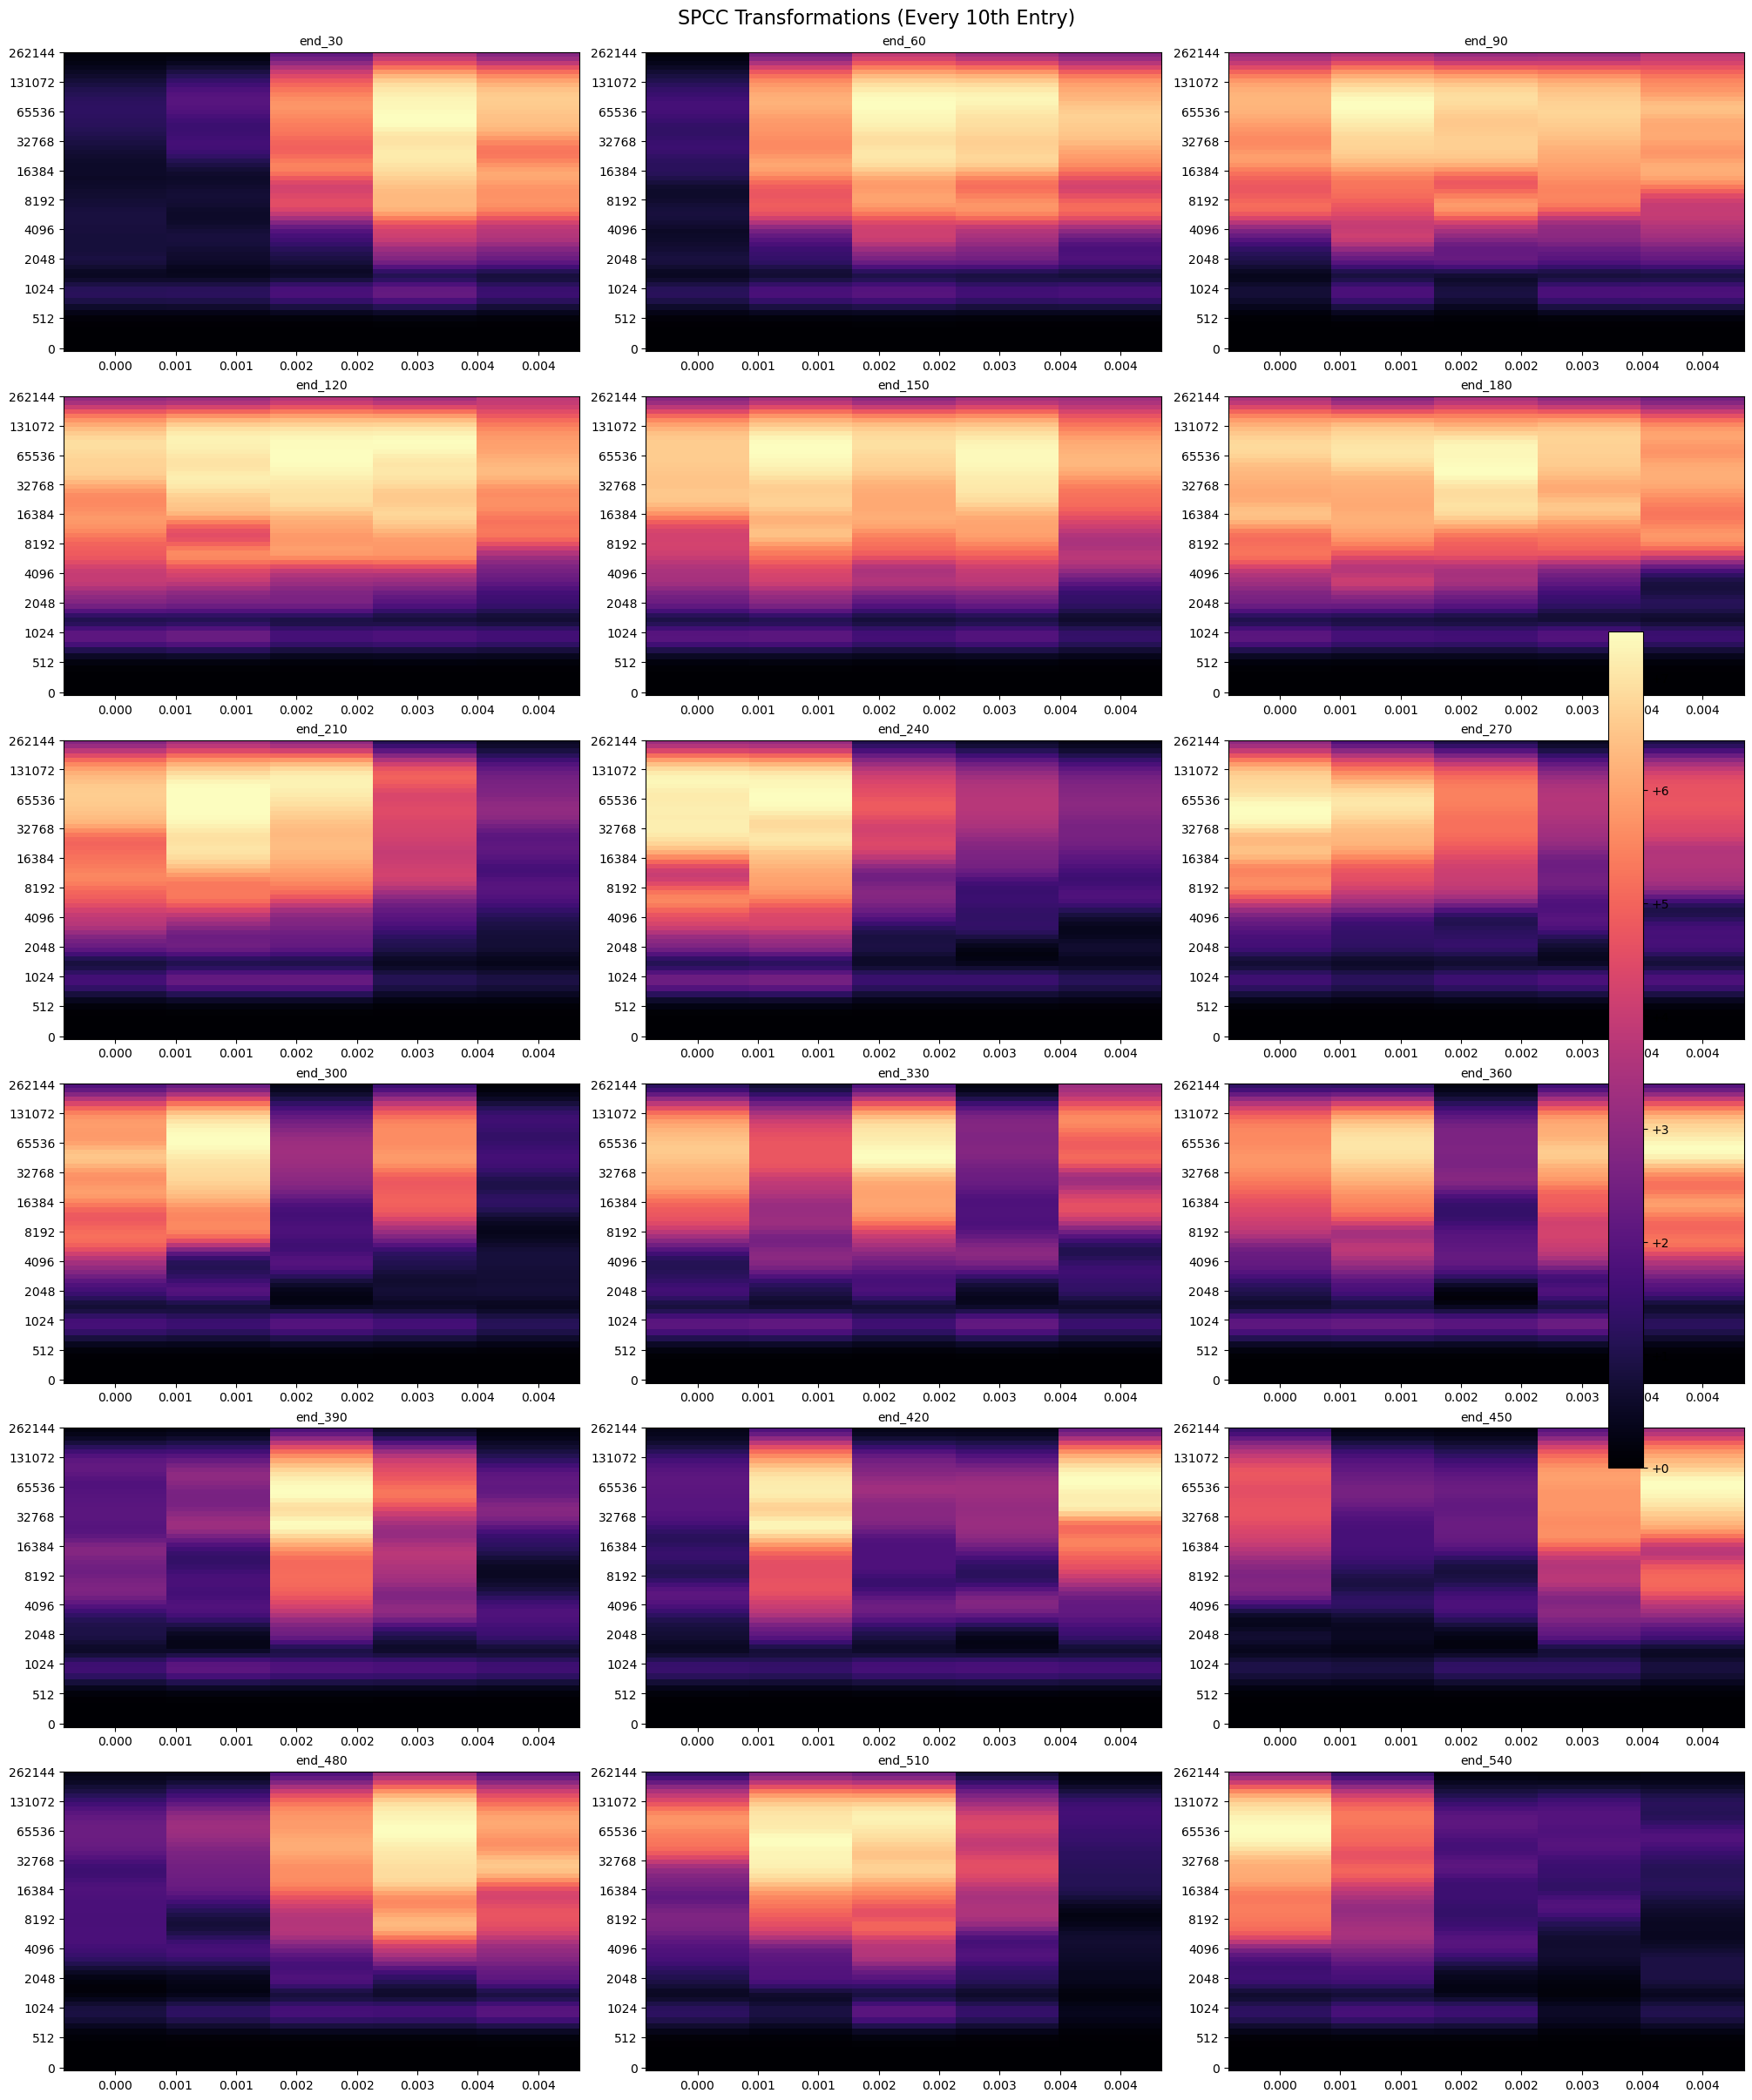

In [121]:
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
from scipy.ndimage import gaussian_filter1d  # SPCC 스무딩 적용

# 샘플링 레이트 설정 (500kHz)
sr = 500000  
desired_length = 2048  # 보간할 데이터 길이
n_mels = 64  # 주파수 해상도 대비 증가
hop_length = 512  # 시간 해상도 증가

# **10의 배수인 key만 필터링**
filtered_keys = [key for key in end_dict.keys() if int(key.split('_')[-1]) % 30 == 0]
num_entries = len(filtered_keys)

# **가로 3개씩 배치 (세로 개수 자동 조정)**
num_cols = 3  # 항상 가로로 3개
num_rows = int(np.ceil(num_entries / num_cols))  # 세로 개수 자동 조정

# 전체 figure 생성 (colorbar용 별도 공간 추가)
fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 4 * num_rows), constrained_layout=True)
axes = axes.flatten()  # 2D 배열을 1D 리스트로 변환

# 각 선택된 end_dict 요소별 SPCC 변환 수행
for idx, key in enumerate(filtered_keys):
    end_data = end_dict[key]

    # 신호 데이터 (첫 번째 컬럼 사용)
    signal = end_data.iloc[:, 0].values  
    signal_length = len(signal)

    # 적절한 n_fft 값 설정 (입력 신호보다 크지 않도록)
    n_fft = min(2048, signal_length // 2)  # 신호의 절반 이하로 제한

    # 기존 인덱스 유지
    x_original = np.arange(len(signal))

    # 보간할 새로운 인덱스 (길이가 부족할 경우 2048 크기로 확장)
    if len(signal) < desired_length:
        x_new = np.linspace(0, len(signal) - 1, desired_length)
        interpolator = interp1d(x_original, signal, kind="linear", fill_value="extrapolate")
        signal_interpolated = interpolator(x_new)
    else:
        signal_interpolated = signal

    # Zero-Padding 적용 (짧은 경우만)
    if len(signal_interpolated) < desired_length:
        pad_width = desired_length - len(signal_interpolated)
        signal_interpolated = np.pad(signal_interpolated, (0, pad_width), mode='constant')

    # Mel Spectrogram 변환
    melspec = librosa.feature.melspectrogram(
        y=signal_interpolated, sr=sr, n_fft=n_fft, hop_length=hop_length, n_mels=n_mels, norm=None
    )

    # SPCC 변환 (log 변환 + Gaussian 스무딩)
    spcc_features = np.log1p(melspec)  # log(1 + x) 변환
    spcc_features = gaussian_filter1d(spcc_features, sigma=2, axis=0)  # 주파수 대역에서 Gaussian 스무딩 적용

    # 현재 subplot 선택
    ax = axes[idx]
    img = librosa.display.specshow(spcc_features, sr=sr, hop_length=hop_length, x_axis='time', y_axis='mel', ax=ax)
    ax.set_title(f"{key}", fontsize=10)  # key 이름을 제목으로 설정
    ax.set_xlabel("")
    ax.set_ylabel("")

# 남은 빈 subplot 숨기기 (데이터 개수가 subplot 개수보다 작을 경우)
for i in range(idx + 1, len(axes)):
    fig.delaxes(axes[i])

# Colorbar를 별도의 축에 추가하여 tight_layout 충돌 방지
cbar_ax = fig.add_axes([0.92, 0.3, 0.02, 0.4])  # 오른쪽에 colorbar 추가
fig.colorbar(img, cax=cbar_ax, format='%+2.0f')

plt.suptitle("SPCC Transformations (Every 10th Entry)", fontsize=16)
plt.show()


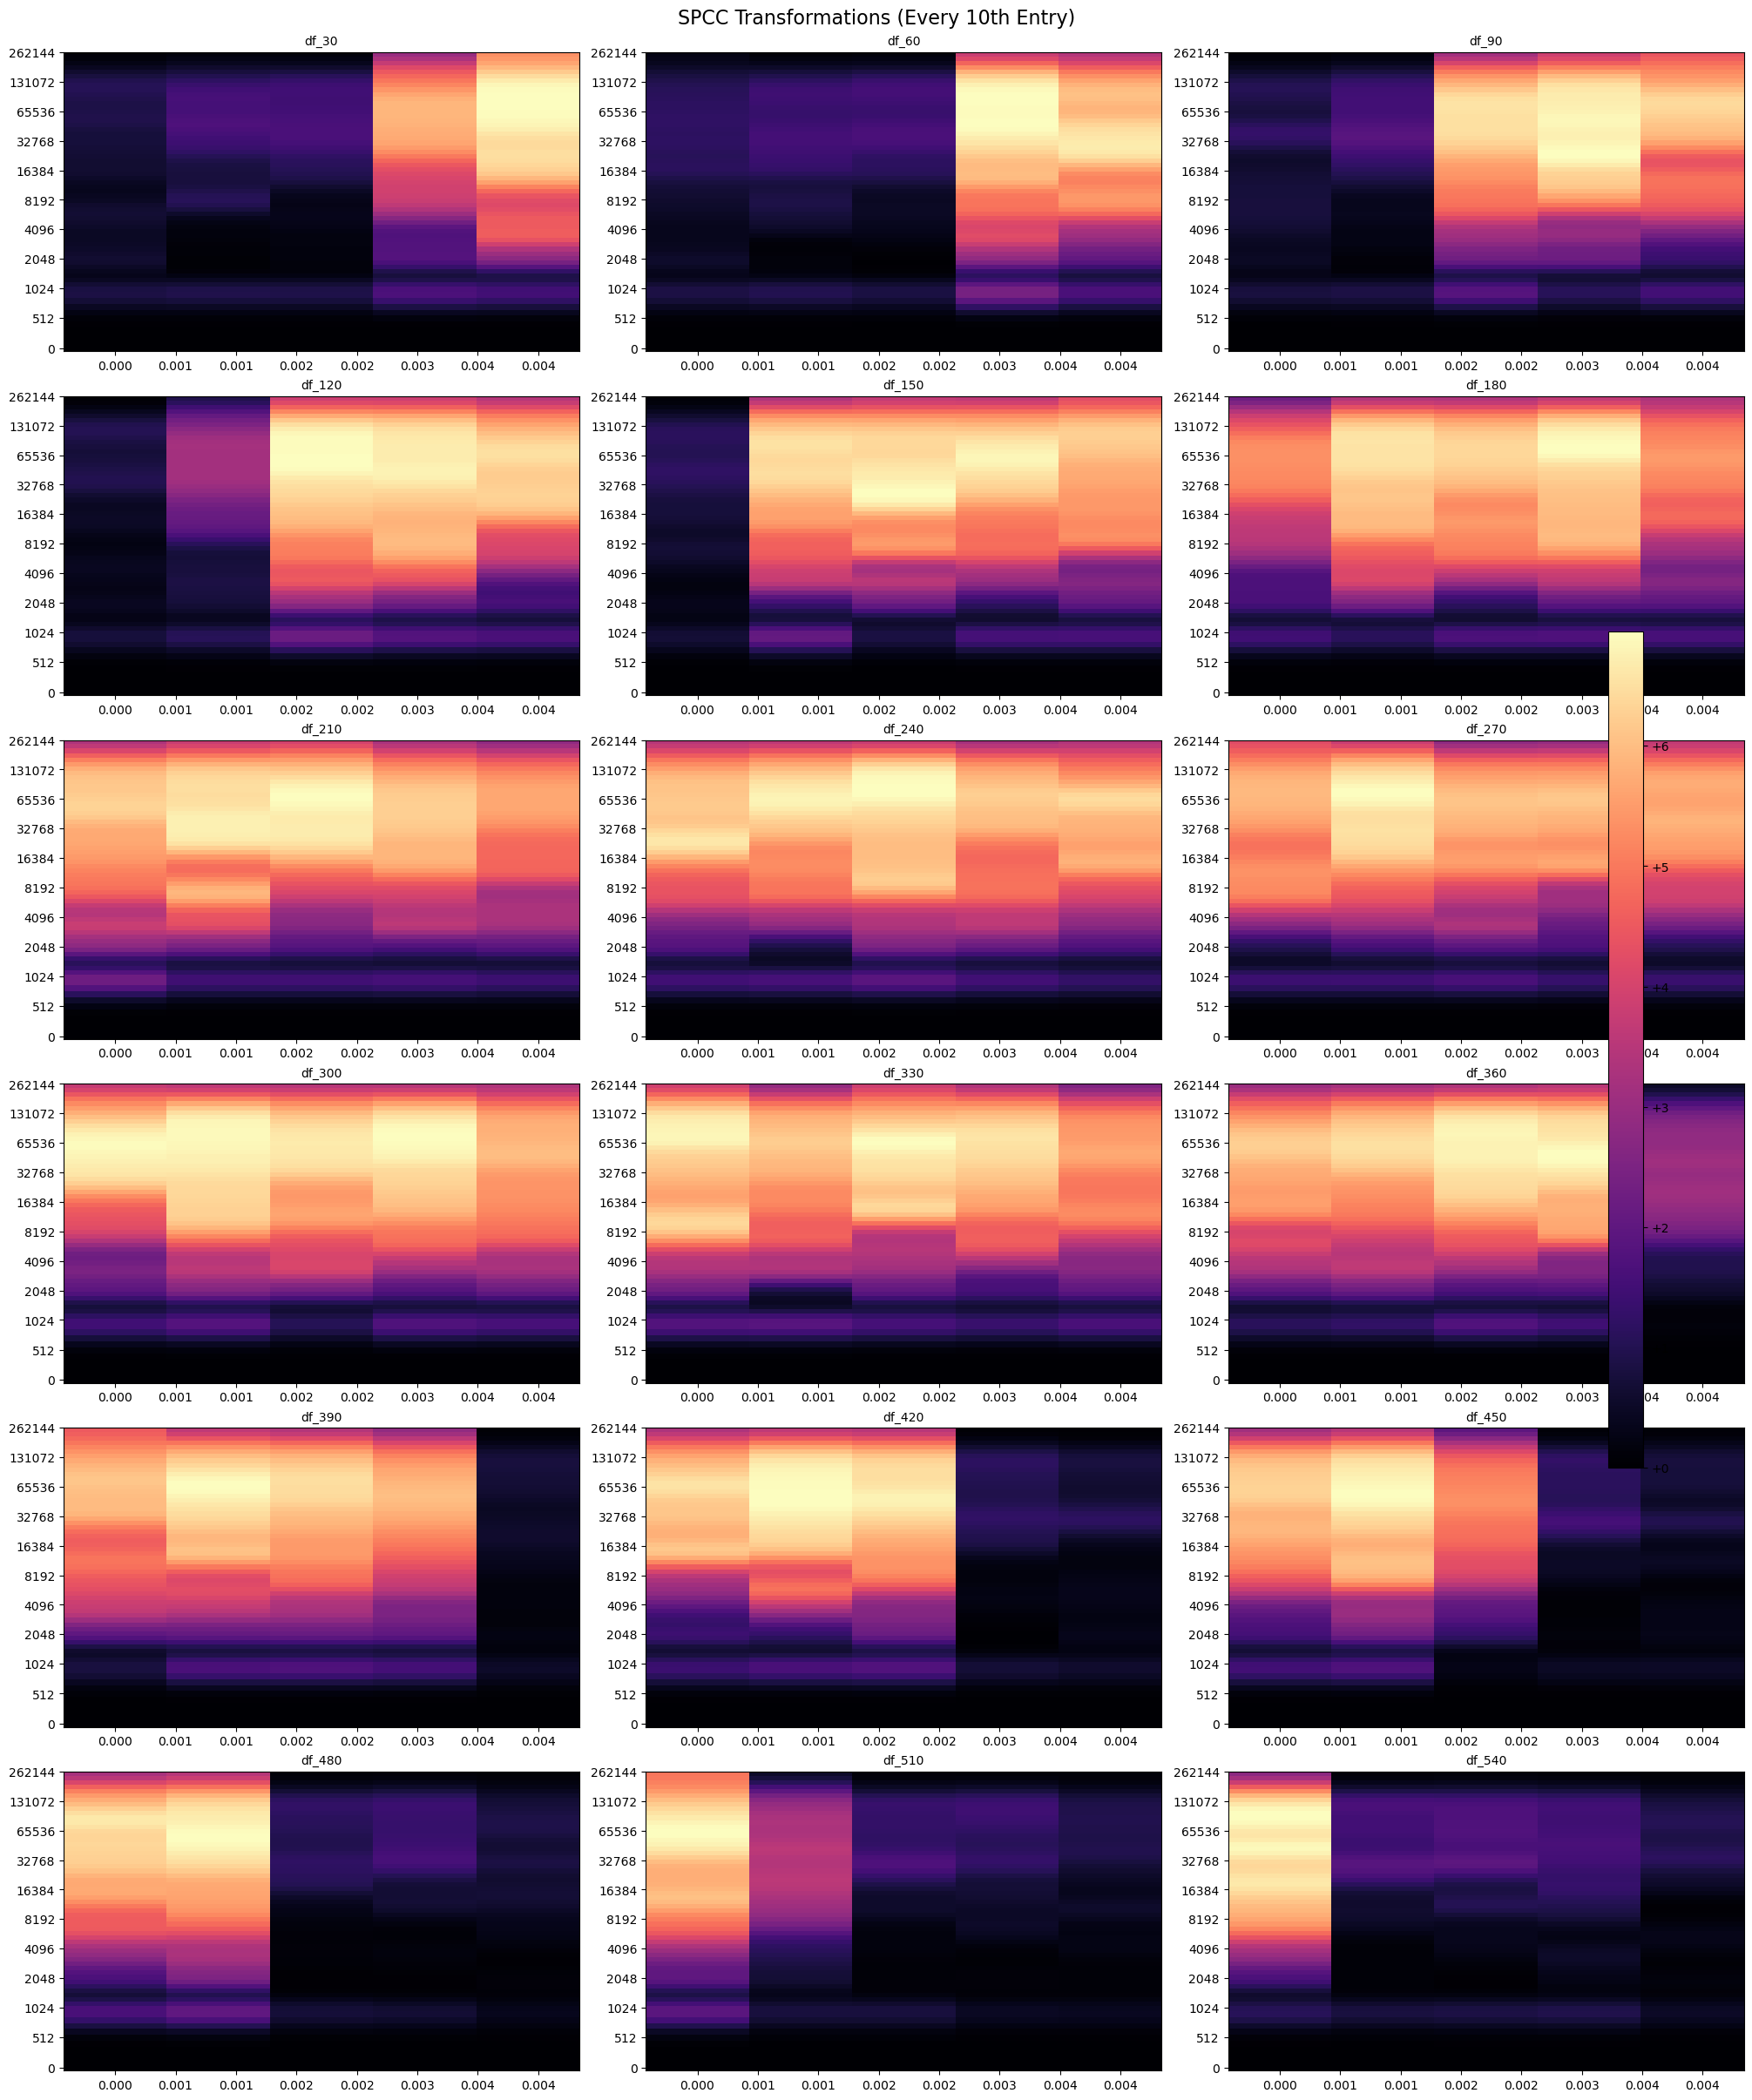

In [120]:
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
from scipy.ndimage import gaussian_filter1d  # SPCC 스무딩 적용

# 샘플링 레이트 설정 (500kHz)
sr = 500000  
desired_length = 2048  # 보간할 데이터 길이
n_mels = 64  # 주파수 해상도 대비 증가
hop_length = 512  # 시간 해상도 증가

# **10의 배수인 key만 필터링**
filtered_keys = [key for key in df_dict.keys() if int(key.split('_')[-1]) % 30 == 0]
num_entries = len(filtered_keys)

# **가로 3개씩 배치 (세로 개수 자동 조정)**
num_cols = 3  # 항상 가로로 3개
num_rows = int(np.ceil(num_entries / num_cols))  # 세로 개수 자동 조정

# 전체 figure 생성 (colorbar용 별도 공간 추가)
fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 4 * num_rows), constrained_layout=True)
axes = axes.flatten()  # 2D 배열을 1D 리스트로 변환

# 각 선택된 end_dict 요소별 SPCC 변환 수행
for idx, key in enumerate(filtered_keys):
    df_data = df_dict[key]

    # 신호 데이터 (첫 번째 컬럼 사용)
    signal = df_data.iloc[:, 0].values  
    signal_length = len(signal)

    # 적절한 n_fft 값 설정 (입력 신호보다 크지 않도록)
    n_fft = min(2048, signal_length // 2)  # 신호의 절반 이하로 제한

    # 기존 인덱스 유지
    x_original = np.arange(len(signal))

    # 보간할 새로운 인덱스 (길이가 부족할 경우 2048 크기로 확장)
    if len(signal) < desired_length:
        x_new = np.linspace(0, len(signal) - 1, desired_length)
        interpolator = interp1d(x_original, signal, kind="linear", fill_value="extrapolate")
        signal_interpolated = interpolator(x_new)
    else:
        signal_interpolated = signal

    # Zero-Padding 적용 (짧은 경우만)
    if len(signal_interpolated) < desired_length:
        pad_width = desired_length - len(signal_interpolated)
        signal_interpolated = np.pad(signal_interpolated, (0, pad_width), mode='constant')

    # Mel Spectrogram 변환
    melspec = librosa.feature.melspectrogram(
        y=signal_interpolated, sr=sr, n_fft=n_fft, hop_length=hop_length, n_mels=n_mels, norm=None
    )

    # SPCC 변환 (log 변환 + Gaussian 스무딩)
    spcc_features = np.log1p(melspec)  # log(1 + x) 변환
    spcc_features = gaussian_filter1d(spcc_features, sigma=2, axis=0)  # 주파수 대역에서 Gaussian 스무딩 적용

    # 현재 subplot 선택
    ax = axes[idx]
    img = librosa.display.specshow(spcc_features, sr=sr, hop_length=hop_length, x_axis='time', y_axis='mel', ax=ax)
    ax.set_title(f"{key}", fontsize=10)  # key 이름을 제목으로 설정
    ax.set_xlabel("")
    ax.set_ylabel("")

# 남은 빈 subplot 숨기기 (데이터 개수가 subplot 개수보다 작을 경우)
for i in range(idx + 1, len(axes)):
    fig.delaxes(axes[i])

# Colorbar를 별도의 축에 추가하여 tight_layout 충돌 방지
cbar_ax = fig.add_axes([0.92, 0.3, 0.02, 0.4])  # 오른쪽에 colorbar 추가
fig.colorbar(img, cax=cbar_ax, format='%+2.0f')

plt.suptitle("SPCC Transformations (Every 10th Entry)", fontsize=16)
plt.show()
